# Taller 2

## Ejercicio 1

### 1. Filtro Infinite Impulse Response

#### Importar liberias

In [2]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt

##### 1.1. IIR pasa banda

###### Filtro digital con retroalimentación que solo deja pasar las frecuencias dentro de un rango específico y atenúa las que están por debajo y por encima

2749440


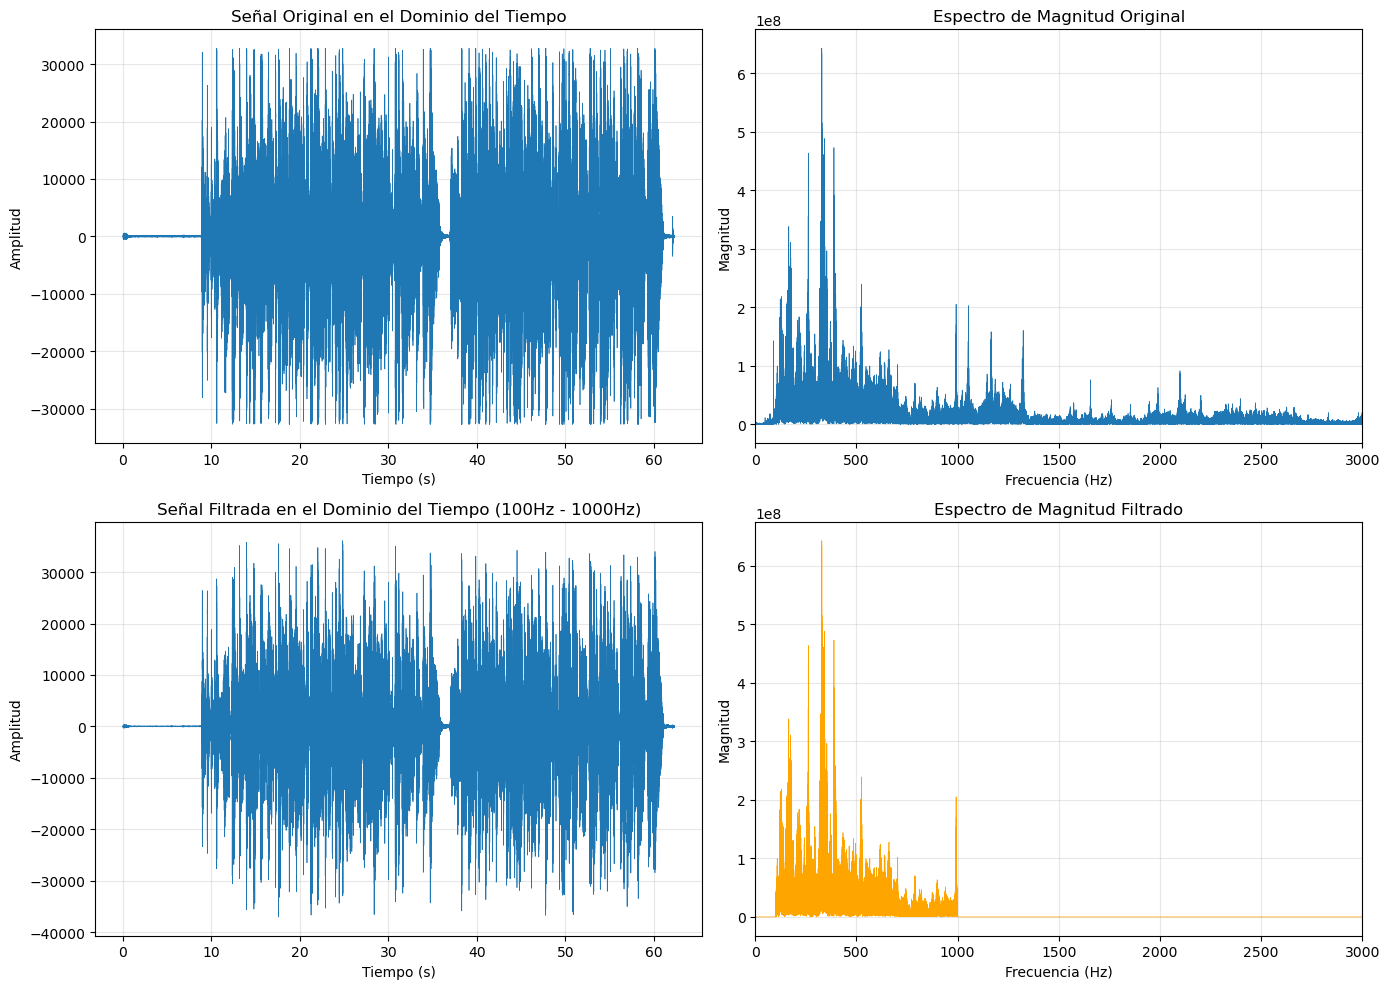

In [3]:
filename = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/grabacion_1.wav'
 
Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes
 
if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data
 
 
# tamaño de la señal
L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo
 
fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos
 
F = Fs*np.arange(0,L//2)/L
frecuencias = np.fft.fftfreq(L,1/Fs) #  Frecuencias en mi archivo de audio
 
# --- Diseño del Filtro Pasa Banda (100Hz - 2000Hz) ---
fc_1 = 100
fc_2 = 1000
 
# Creamos una sola máscara que cumpla ambas condiciones
filtro_mask = (np.abs(frecuencias) >= fc_1) & (np.abs(frecuencias) <= fc_2)
 
# aplicar el filtro
X_filtrado = fft * filtro_mask
 
# Dominio del tiempo
 
audio_filtrado = np.fft.ifft(X_filtrado)
audio_filtrado = np.real(audio_filtrado)
 
# Guardar el nuevo archivo
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/grabacion_pbanda_IIR.wav'
waves.write(ruta,Fs,audio_filtrado.astype(np.int16))

# --- Visualización de Resultados ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, Audio_m, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
axes[0, 1].plot(F, M_fft, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (100Hz - 1000Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(X_filtrado)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='orange')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 1.2. IRR Butterworth

###### Filtro digital con retroalimentación diseñado para tener una respuesta en frecuencia lo más plana posible dentro de la banda permitida, sin ondulaciones

In [4]:
from scipy.signal import butter, lfilter
filename = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/grabacion_1.wav'
 
Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes
 
if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data
 
data_norm = data /np.max(np.abs(data))
L = len(data_norm)
fft = np.fft.fft(data_norm)
frecuencias = np.fft.fftfreq(L,1/Fs)
 
def butter_lowpass(fc,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b , a = butter(order, normal_fc, btype='low', analog=False)
    return b,a
 
def butter_highpass(fc,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b , a = butter(order, normal_fc, btype='high', analog=False)
    return b,a  
 
def butter_bandpass(fc_1,fc_2,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    low = fc_1 / nyq
    high = fc_2 / nyq
    b , a = butter(order,[low,high], btype='band', analog=False)
    return b,a


##### 1.2.1. IIR buttherworth Pasa Bajo

######  Filtro digital con retroalimentación que deja pasar solo las frecuencias bajas y atenúa progresivamente las altas, logrando una banda permitida sin ondulaciones.

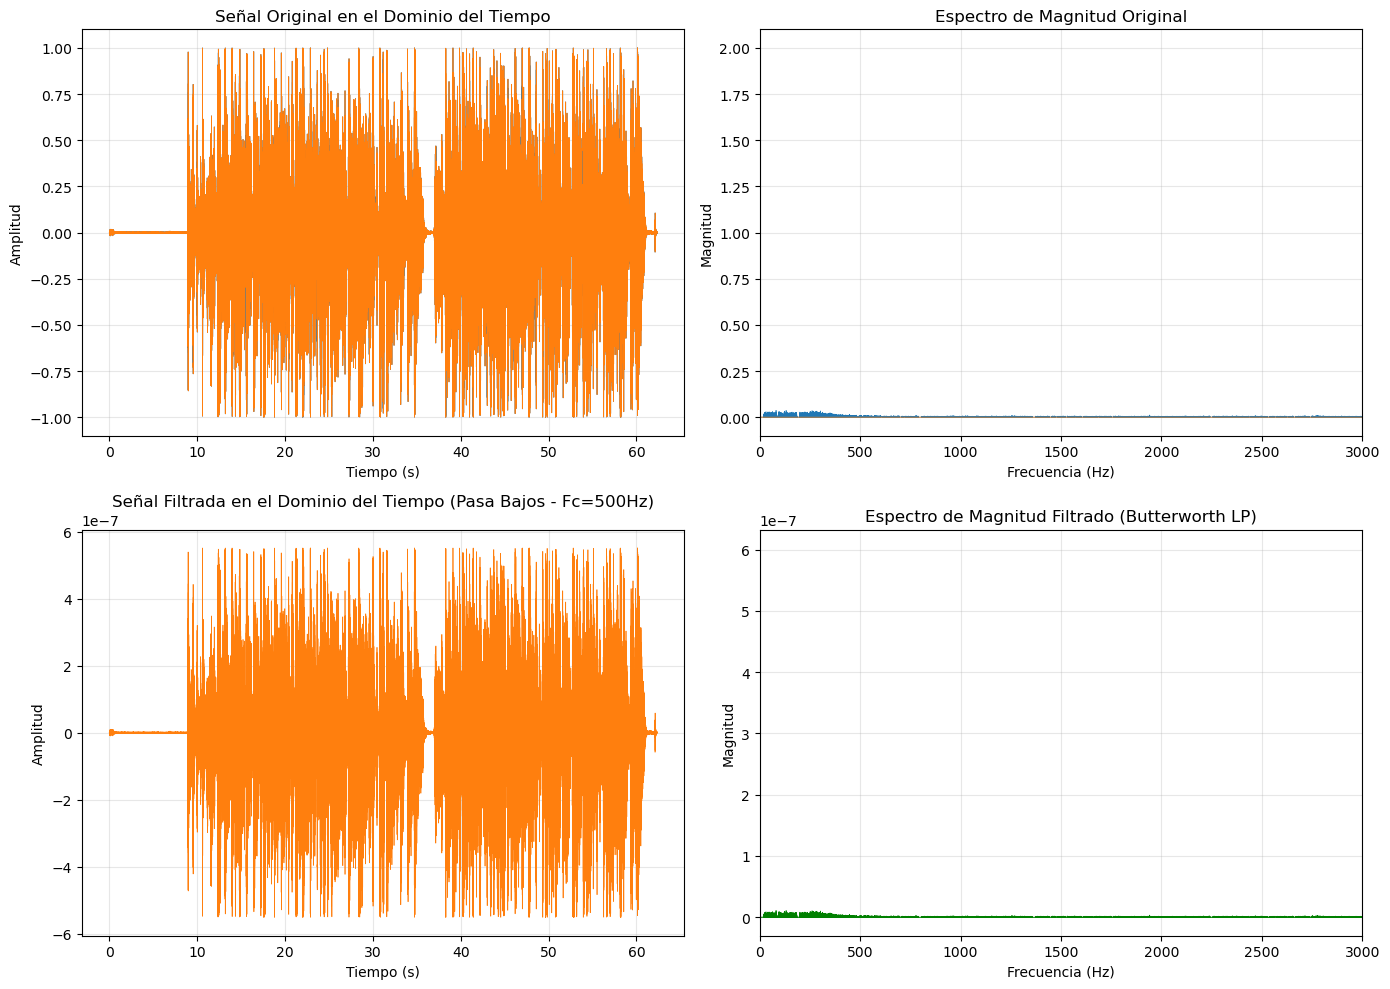

In [5]:
#### filtro pasa bajos
fc = 500
b,a = butter_lowpass(fc,Fs,order= 5)
# aplicar el filtro
audio_filtrado_iir = lfilter (b,a,data_norm)
 
fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
audio_final = (audio_filtrado_iir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/butter_lp_500.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_iir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (Pasa Bajos - Fc=500Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='green')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (Butterworth LP)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 1.2.2. IIR Butterworth Pasa Banda

###### Filtro digital con retroalimentación que deja pasar solo las frecuencias dentro de un rango específico y atenúa las que están por debajo y por encima, manteniendo una banda útil sin ondulaciones

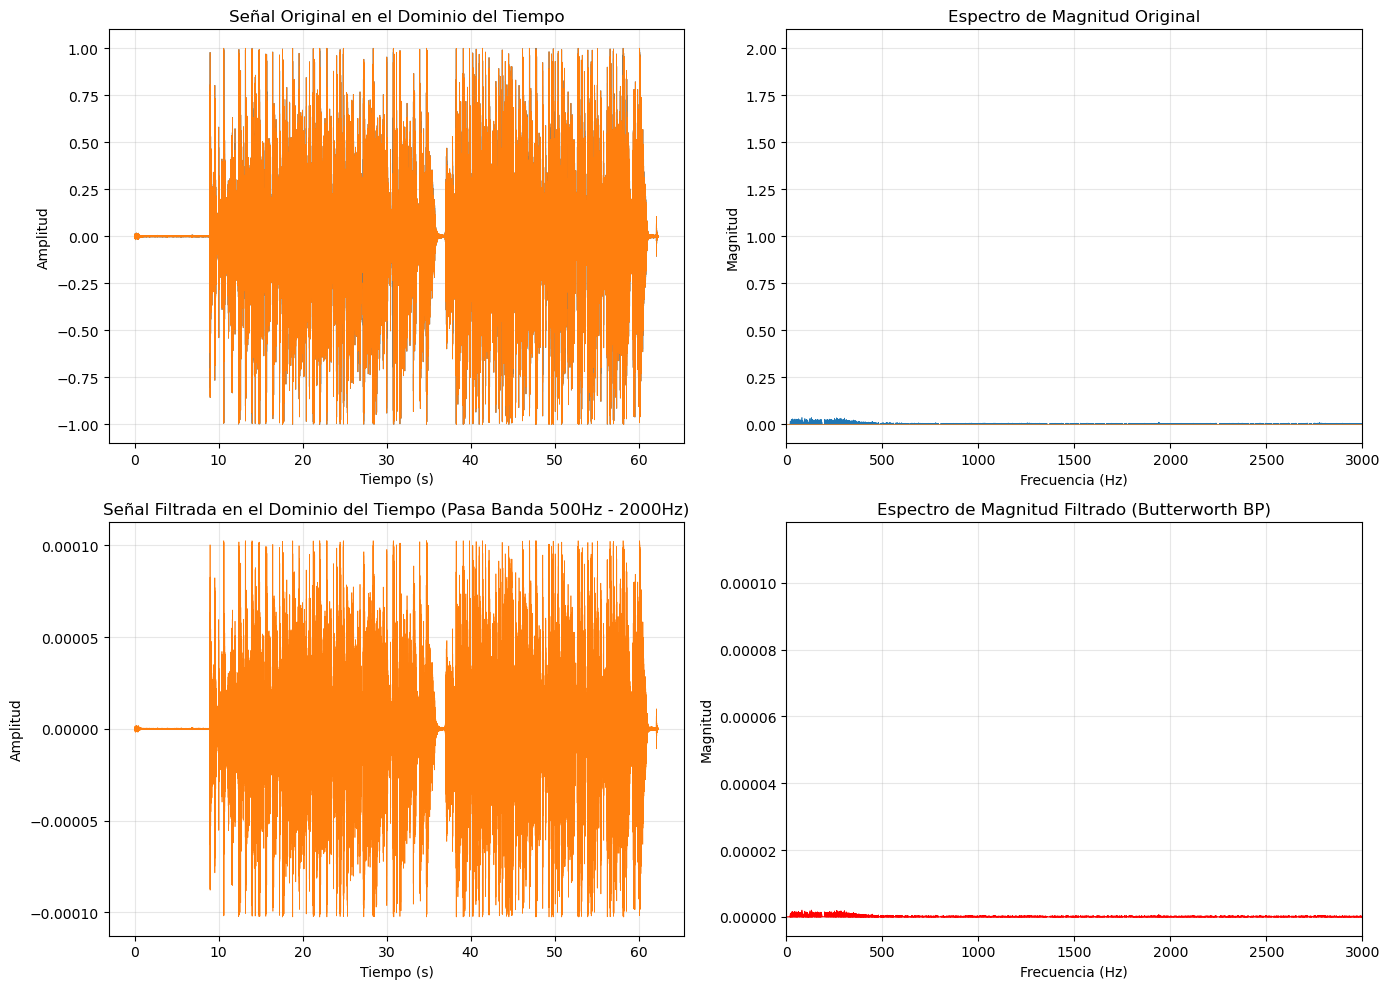

In [6]:
#### filtro pasabanda
fc_1 = 500.0
fc_2 = 2000.0
b,a = butter_bandpass(fc_1,fc_2,Fs,order= 5)
# aplicar el filtro
audio_filtrado_iir = lfilter (b,a,data_norm)
 
fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
audio_final = (audio_filtrado_iir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/butter_bandpass.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_iir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (Pasa Banda 500Hz - 2000Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='red')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (Butterworth BP)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 1.2.3. IIR Butterworth Pasa Alto

###### Filtro digital con retroalimentación que deja pasar solo las frecuencias altas y atenúa las frecuencias bajas, manteniendo una respuesta sin ondulaciones

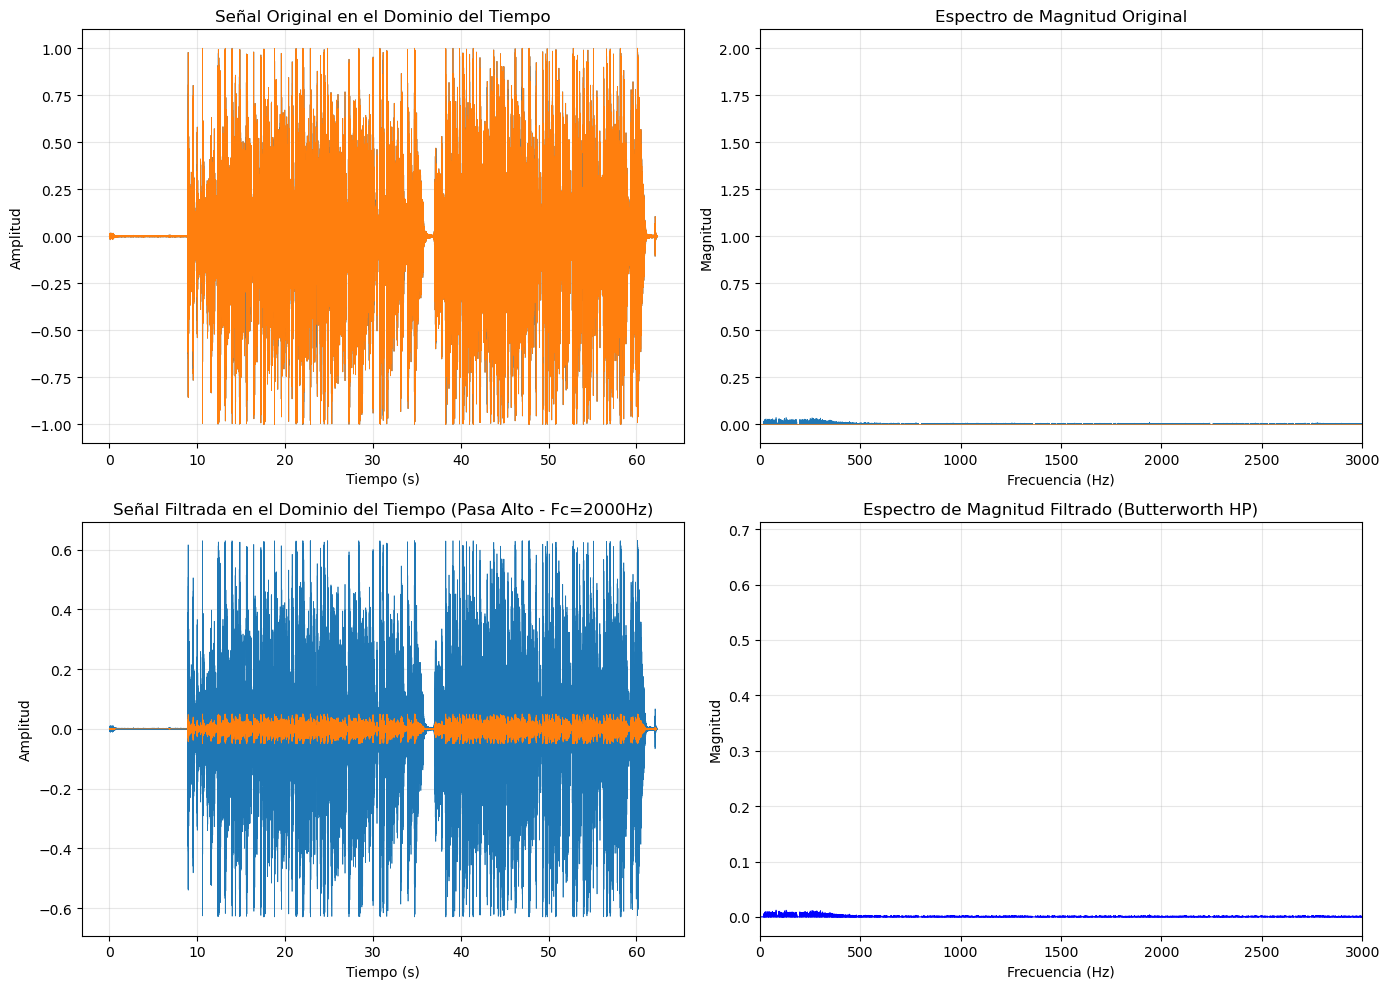

In [7]:
#### filtro pasa alto
fc = 2000
b,a = butter_highpass(fc,Fs,order= 5)
# aplicar el filtro
audio_filtrado_iir = lfilter (b,a,data_norm)
 
fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
audio_final = (audio_filtrado_iir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/butter_hp_2000.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_iir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (Pasa Alto - Fc=2000Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='blue')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (Butterworth HP)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

### 2. Filtro Finite Impulse Responde

##### 2.1. FIR Pasa Alto Window = Hamming

###### Filtro digital sin retroalimentación que deja pasar solo las frecuencias altas y atenúa las bajas, cuyos coeficientes se obtienen aplicando la ventana de Hamming para suavizar la transición y reducir los efectos indeseados en la respuesta en frecuencia

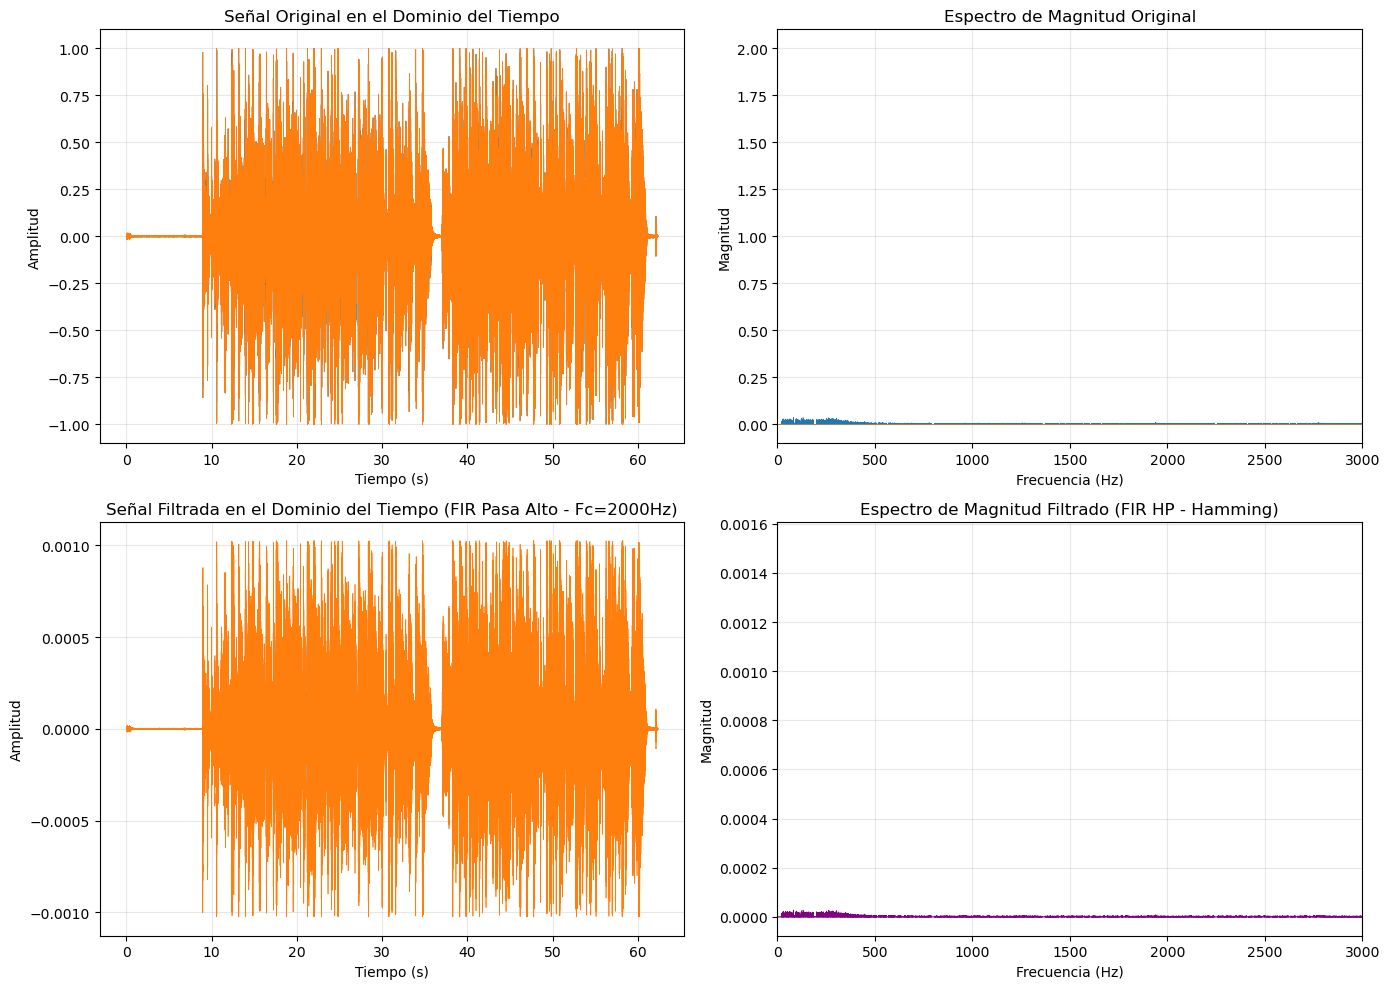

In [8]:
from scipy.signal import firwin, lfilter

def fir_highpass(fc, fs, ntaps=101):
    nyq = 0.5 * fs
    taps = firwin(ntaps, fc/nyq, pass_zero=False, window='hamming')
    return taps

# Corte para pasa-alto (ejemplo: 2000 Hz)
fc = 2000
taps = fir_highpass(fc, Fs)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# Escalar a 16 bits y guardar
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_hp_2000.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_fir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (FIR Pasa Alto - Fc=2000Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='purple')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (FIR HP - Hamming)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 2.2. FIR Pasa Bajo con ventana de Hamming

###### Filtro digital sin retroalimentación que deja pasar solo las frecuencias bajas y atenúa las altas, cuyos coeficientes se obtienen aplicando la ventana de Hamming para suavizar la transición y reducir ondulaciones en la respuesta en frecuencia

In [ ]:
from scipy.signal import firwin, lfilter

def fir_lowpass (fc, fs,ntaps= 101):
    nyq = 0.5 * fs
    taps = firwin(ntaps,fc/nyq, pass_zero=False,window='hamming')
    return taps

fc = 500
taps = fir_lowpass (fc, Fs)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# escalar a 16 bits
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_lp_500.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_fir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (FIR Pasa Bajo - Fc=500Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='cyan')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (FIR LP - Hamming)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()